# Ford GoBike Data - Exploratory Analysis

## by Dishant Tanwar

## Preliminary Wrangling

> Ford GoBike is a subscription based bike rental service, starting at just $2 per ride. Two blocks or two miles, bikes are a fun and affordable way to get around.

> We're going to explore some interesting facts and trends regarding this bike sharing giant for Year `2019`

### The Data  
Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [4]:
# import all packages and set plots to be embedded inline
import matplotlib.pyplot as plt

from zipfile import ZipFile
from io import BytesIO

import numpy as np
import pandas as pd
import seaborn as sns

import requests
import time
import os

%matplotlib inline

## Gather Data
> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [7]:
req_cols = ['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type']
len(req_cols)

13

In [59]:
# Gather each month's data for 2019 
urls = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
       'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip'
       ]
for url in urls:
    response = requests.get(url)
    zip_file = ZipFile(BytesIO(response.content))
    zip_file.extractall('ford-gobike-trip-data-2019')

In [2]:
# Read all data files seprately and storing in a list
path = r'ford-gobike-trip-data-2019'
month_wise_dfs = []

for file in os.listdir(path):
    month_wise_dfs.append(pd.read_csv(path + '/' + file, ))    

E:\InstalledPrograms\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\InstalledPrograms\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
E:\InstalledPrograms\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Check if all columns have same names
if all([set(month_wise_dfs[0].columns) == set(df.columns) for df in month_wise_dfs[0:6]]):
    print('All have the same columns')
else:
    print('Some have different columns')

Some have different columns


Since we have some integrety issues with column names, we'll only get the columns we are interested in. Which are described in the start.

In [8]:
# Selecting only the reqiured columns
new_month_wise_dfs = []
for df in month_wise_dfs:
    new_month_wise_dfs.append(df[req_cols])

In [9]:
# Check if all columns have same names
if all([set(new_month_wise_dfs[0].columns) == set(df.columns) for df in new_month_wise_dfs]):
    print('All have the same columns')
else:
    print('Some have different columns')

All have the same columns


In [10]:
# Concatinate all data frames into one
master_df = pd.concat(new_month_wise_dfs)
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


### Inspect master_df for Issues

In [11]:
master_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 13 columns):
duration_sec               2506983 non-null int64
start_time                 2506983 non-null object
end_time                   2506983 non-null object
start_station_id           2426249 non-null float64
start_station_name         2426850 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
end_station_id             2424081 non-null float64
end_station_name           2424633 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
bike_id                    2506983 non-null int64
user_type                  2506983 non-null object
dtypes: float64(6), int64(2), object(5)
memory usage: 267.8+ MB


In [12]:
master_df.duplicated().sum()

0

In [13]:
master_df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           80734
start_station_name         80133
start_station_latitude         0
start_station_longitude        0
end_station_id             82902
end_station_name           82350
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
dtype: int64

In [314]:
# Dataset for which Year ?
y = master_df.start_time.apply(lambda x: x.split('-')[0])
np.sort(y.unique())

array(['2019'], dtype=object)

In [315]:
# Months Available
y = master_df.start_time.apply(lambda x: x.split('-')[1])
np.sort(y.unique())

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

### Quality Issues

The Dataset seem good. 
 1. We've a number of null values for `start` and `end` `station names and ids`. Let's `drop` these  observations.
 - `Drop` start_station and end_station's `longitude` and `latitude` columns.
 - Incorrect Data Types : ex.`start_time, end_time` should be in `timestamp` format. 

**#1 Define**
> Drop null valued observations.

**Code**

In [14]:
master_df.dropna(inplace = True)

**Test**

In [15]:
master_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

**#3 Define**
> Incorrect Data Types
- `start_time, end_time` should be in `timestamp` format.
- start, end station ids should be `str`
- `user_type` shoulde be a category

**Code**

In [17]:
master_df['start_time'] = pd.to_datetime(master_df['start_time'])
master_df['end_time'] = pd.to_datetime(master_df['end_time'])

master_df['start_station_id'] = master_df['start_station_id'].astype('str')
master_df['end_station_id'] = master_df['end_station_id'].astype('str')
master_df['bike_id'] = master_df['bike_id'].astype('str')

master_df['user_type'] = master_df['user_type'].astype('category')

**Test**

In [18]:
master_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 149779
Data columns (total 13 columns):
duration_sec               2407259 non-null int64
start_time                 2407259 non-null datetime64[ns]
end_time                   2407259 non-null datetime64[ns]
start_station_id           2407259 non-null object
start_station_name         2407259 non-null object
start_station_latitude     2407259 non-null float64
start_station_longitude    2407259 non-null float64
end_station_id             2407259 non-null object
end_station_name           2407259 non-null object
end_station_latitude       2407259 non-null float64
end_station_longitude      2407259 non-null float64
bike_id                    2407259 non-null object
user_type                  2407259 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 241.1+ MB


## Data Analysis

In [20]:
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer


**Let's create more columns**
>1. **displacement**: displacement in miles from start to end station
- **duration_min** : Ride Time in minutes
- **month** : Bike issued month
- **day** : Bike issued Day

**#1 Define**
> create column **displacement** : displacement in miles from start to end station

**Code**

In [21]:
from math import cos, asin, sqrt, pi

def displacement(row):
    lat1 = row.start_station_latitude
    lon1 = row.start_station_longitude
    lat2 = row.end_station_latitude
    lon2 = row.end_station_longitude
    p = pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 12742 * np.arcsin(np.sqrt(a))

In [22]:
start = time.time()
master_df['displacement'] = master_df.apply(lambda row: displacement(row), axis=1)
end = time.time()
print('Total Time Taken (min)', (end - start)/60)

Total Time Taken (min) 4.6530083576838175


**#1.1 Define** 
> `Drop` start_station and end_station's `longitude` and `latitude` columns.

**Code**

In [23]:
to_drop = ['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude']
master_df.drop(to_drop, axis = 1, inplace = True)
print('Done')

Done


**Test**

In [40]:
master_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 149779
Data columns (total 15 columns):
duration_sec          2407259 non-null int64
start_time            2407259 non-null datetime64[ns]
end_time              2407259 non-null datetime64[ns]
start_station_id      2407259 non-null object
start_station_name    2407259 non-null object
end_station_id        2407259 non-null object
end_station_name      2407259 non-null object
bike_id               2407259 non-null object
user_type             2407259 non-null category
displacement          2407259 non-null float64
duration_mins         2407259 non-null float64
month                 2407259 non-null category
day                   2407259 non-null int64
hour                  2407259 non-null int64
weekday               2407259 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 245.6+ MB


**#2 Define**
>add column **duration_mins** & **duration_hrs** : Ride Time in minutes & hours

**Code**

In [25]:
master_df['duration_mins'] = master_df.duration_sec/60
print('Done')

Done


In [39]:
master_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 149779
Data columns (total 15 columns):
duration_sec          2407259 non-null int64
start_time            2407259 non-null datetime64[ns]
end_time              2407259 non-null datetime64[ns]
start_station_id      2407259 non-null object
start_station_name    2407259 non-null object
end_station_id        2407259 non-null object
end_station_name      2407259 non-null object
bike_id               2407259 non-null object
user_type             2407259 non-null category
displacement          2407259 non-null float64
duration_mins         2407259 non-null float64
month                 2407259 non-null category
day                   2407259 non-null int64
hour                  2407259 non-null int64
weekday               2407259 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 245.6+ MB


**Test**

In [232]:
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,displacement,duration_mins
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,5.305199,1347.083333
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,3.859628,1098.333333
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,3.287098,1043.883333
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,0.999632,744.666667
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,0.953355,1011.816667


**#3 Define**
>Add columns for `month` and `day`

**Code**

In [29]:
master_df['month'] = master_df.start_time.dt.month_name()
master_df['day'] = master_df.start_time.dt.day
master_df['hour'] = master_df.start_time.dt.hour
master_df['weekday'] = master_df.start_time.dt.weekday_name

**Additional Issues**  


**Define**
Changing Datatypes
- category: weekday_name, month
- object: day, hour

**Code**

In [28]:
master_df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [34]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_cat = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
master_df['weekday'] = master_df['weekday'].astype(weekday_cat)

months = master_df.month.unique()
months_cat = pd.api.types.CategoricalDtype(ordered = True, categories = months) 
master_df['month'] = master_df['month'].astype(months_cat)


master_df.day.astype('str', inplace = True)
master_df.hour.astype('str', inplace = True)
print('Done')

Done


**Test**

In [35]:
master_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 149779
Data columns (total 15 columns):
duration_sec          2407259 non-null int64
start_time            2407259 non-null datetime64[ns]
end_time              2407259 non-null datetime64[ns]
start_station_id      2407259 non-null object
start_station_name    2407259 non-null object
end_station_id        2407259 non-null object
end_station_name      2407259 non-null object
bike_id               2407259 non-null object
user_type             2407259 non-null category
displacement          2407259 non-null float64
duration_mins         2407259 non-null float64
month                 2407259 non-null category
day                   2407259 non-null int64
hour                  2407259 non-null int64
weekday               2407259 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 245.6+ MB


### Save master_df in csv file

In [37]:
master_df.to_csv('ford-go-bike-master.csv', index = False)
print('Done')

Done


**Read from master csv file**

In [6]:
df = pd.read_csv('ford-go-bike-master.csv')

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

df['user_type'] = df['user_type'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_cat = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
df['weekday'] = df['weekday'].astype(weekday_cat)

months = df.month.unique()
months_cat = pd.api.types.CategoricalDtype(ordered = True, categories = months) 
df['month'] = df['month'].astype(months_cat)


df.day.astype('str', inplace = True)
df.hour.astype('str', inplace = True)
print('Done')

Done


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 15 columns):
duration_sec          int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id      object
start_station_name    object
end_station_id        object
end_station_name      object
bike_id               object
user_type             category
displacement          float64
duration_mins         float64
month                 category
day                   int64
hour                  int64
weekday               category
dtypes: category(3), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 227.3+ MB


## Exploration

In [9]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,displacement,duration_mins,month,day,hour,weekday
2186598,538,2019-11-14 10:35:54.166,2019-11-14 10:44:53.048,238.0,MLK Jr Way at University Ave,256.0,Hearst Ave at Euclid Ave,10106,Subscriber,1.161411,8.966667,November,14,10,Thursday
833279,201,2019-04-04 17:25:50.195,2019-04-04 17:29:11.990,350.0,8th St at Brannan St,67.0,San Francisco Caltrain Station 2 (Townsend St...,6282,Subscriber,1.071735,3.350000,April,4,17,Thursday
593663,1214,2019-03-06 17:43:06.964,2019-03-06 18:03:21.922,36.0,Folsom St at 3rd St,375.0,Grove St at Masonic Ave,6442,Customer,4.307705,20.233333,March,6,17,Wednesday
349939,1307,2019-02-05 19:06:10.943,2019-02-05 19:27:58.014,23.0,The Embarcadero at Steuart St,74.0,Laguna St at Hayes St,858,Subscriber,3.516717,21.783333,February,5,19,Tuesday
1989034,396,2019-10-14 21:29:30.183,2019-10-14 21:36:07.113,5.0,Powell St BART Station (Market St at 5th St),78.0,Folsom St at 9th St,10811,Subscriber,1.166649,6.600000,October,14,21,Monday


In [10]:
df['duration_mins'] = df.duration_mins.apply(lambda val: round(val, 2))
df['displacement'] = df.displacement.apply(lambda val: round(val, 4))

In [11]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.describe()

(2407259, 15)
duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id              object
start_station_name            object
end_station_id                object
end_station_name              object
bike_id                       object
user_type                   category
displacement                 float64
duration_mins                float64
month                       category
day                            int64
hour                           int64
weekday                     category
dtype: object


,duration_sec,displacement,duration_mins,day,hour
count,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06
mean,8.048171e+02,2.062120e+00,1.341362e+01,1.558986e+01,1.351664e+01
std,1.910718e+03,6.849460e+01,3.184531e+01,8.660494e+00,4.801285e+00
min,6.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.580000e+02,9.318000e-01,5.970000e+00,8.000000e+00,9.000000e+00
50%,5.690000e+02,1.453600e+00,9.480000e+00,1.500000e+01,1.400000e+01
75%,8.830000e+02,2.229900e+00,1.472000e+01,2.300000e+01,1.700000e+01
max,8.623000e+04,1.279973e+04,1.437170e+03,3.100000e+01,2.300000e+01


In [12]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407259 entries, 0 to 2407258
Data columns (total 15 columns):
duration_sec          2407259 non-null int64
start_time            2407259 non-null datetime64[ns]
end_time              2407259 non-null datetime64[ns]
start_station_id      2407259 non-null object
start_station_name    2407259 non-null object
end_station_id        2407259 non-null object
end_station_name      2407259 non-null object
bike_id               2407259 non-null object
user_type             2407259 non-null category
displacement          2407259 non-null float64
duration_mins         2407259 non-null float64
month                 2407259 non-null category
day                   2407259 non-null int64
hour                  2407259 non-null int64
weekday               2407259 non-null category
dtypes: category(3), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 227.3+ MB


### Main feature(s) of interest in our dataset.
- user_type
- displacement
- duration_mins
- month, day, hour, weekday

> All these above mentioned features will help us solve a number of questions by themselves when combined with `bike_id`.

Lets's get started with our exploration and see what solutions we can get from our dataset, utilizing the above mentioned features.

## Univariate Exploration

**Ride Duration in minutes**

In [334]:
np.percentile(df.duration_mins, 75)

14.72

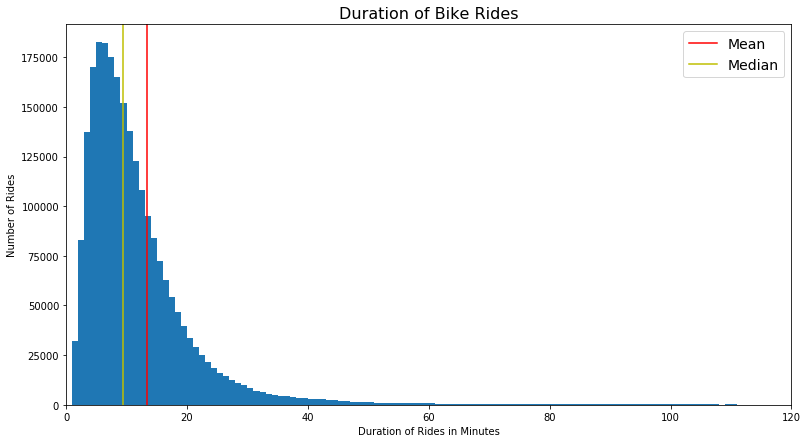

In [13]:
plt.figure(figsize=(13,7))
bins = np.arange(0, df.duration_mins.max() + 1, 1)
plt.hist(data = df, x = 'duration_mins', bins = bins);
plt.xlim(0,120);

plt.axvline(df.duration_mins.mean(), color = 'r', label = 'Mean')
plt.axvline(df.duration_mins.median(), color = 'y', label = 'Median')
plt.legend(fontsize = 14)


plt.title('Duration of Bike Rides', fontsize = 16);
plt.xlabel('Duration of Rides in Minutes');
plt.ylabel('Number of Rides');

> A right skewed histogram with mean and median between 10 to 15 minutes. Giving us insight that people rent bikes for around 10-15 minutes.

**Frequency of User Types**

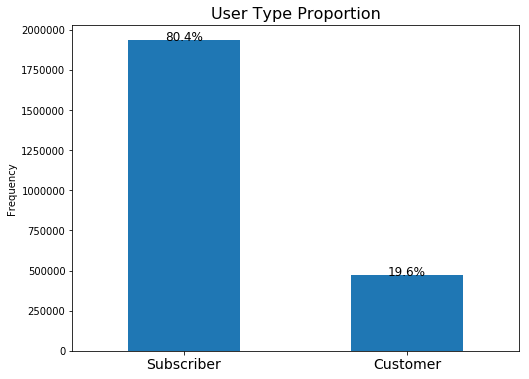

In [14]:
base_color = sns.color_palette()[0]
plt.figure(figsize = (8,6))
df.user_type.value_counts().plot(kind='bar', color = base_color)

plt.title('User Type Proportion', fontsize = 16);
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=14)
# add annotations
n_points = df.shape[0]
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get thze current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black', fontsize=12)


> We have around 4 times more Subscribers than Customers

**Number of Rides per month**

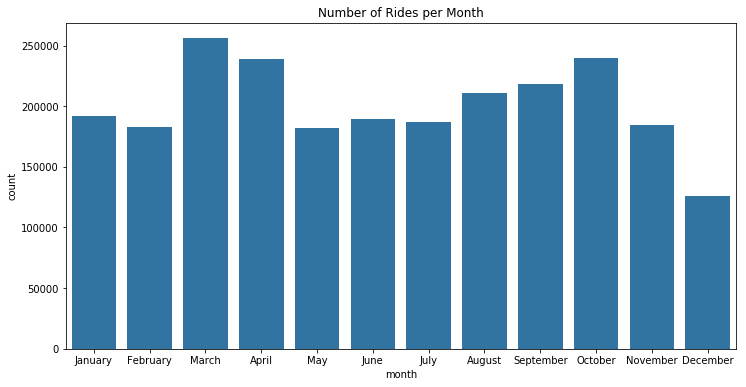

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x='month', color = base_color)
plt.title('Number of Rides per Month');

> During Winter peak winter and summer the number of users is at its lowest. Speciall during December.

**Rides per day**

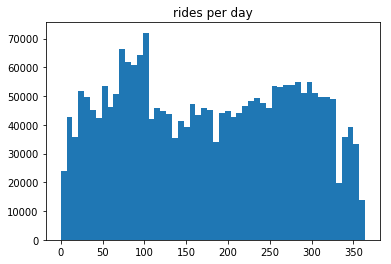

In [16]:
day_of_year = df.start_time.dt.dayofyear
bins = np.arange(0,370,7)
plt.hist(day_of_year, bins=bins);
plt.title('rides per day');

**Rides per hour**

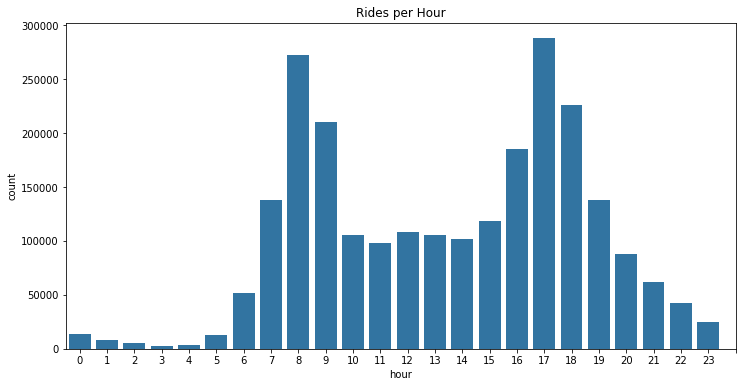

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(df['hour'], color=base_color);
plt.xticks(np.arange(0,25));
plt.title('Rides per Hour');

>It's kind of a `bimodal` distrubition where the bike rents it at `peak` at `8 am and 5 pm`.

**Rides per Weekday**

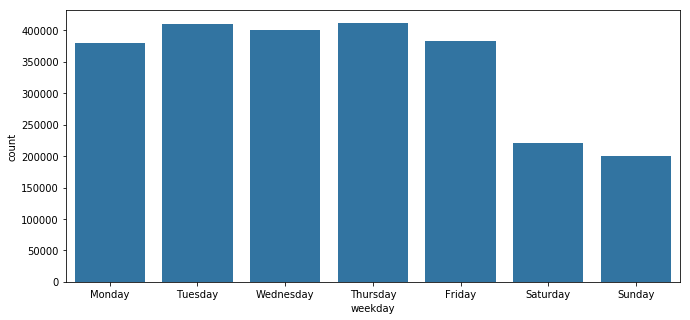

In [18]:
plt.figure(figsize=(11,5))
sns.countplot(df.weekday, color=base_color);

> Looks like people don't prefer using bike rides during weekends. 

**Displacement**

In [19]:
df.displacement.describe()

count    2.407259e+06
mean     2.062120e+00
std      6.849460e+01
min      0.000000e+00
25%      9.318000e-01
50%      1.453600e+00
75%      2.229900e+00
max      1.279973e+04
Name: displacement, dtype: float64

In [33]:
df[df.displacement == df.displacement.max()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,displacement,duration_mins,month,day,hour,weekday
2106264,66037,2019-11-25 16:40:51.382,2019-11-26 11:01:28.665,485.0,Funston Ave at Fulton St,449.0,16th Depot Bike Fleet Station,12577,Customer,12799.7278,1100.62,November,25,16,Monday


In [39]:
print('Hour Time for this ride' , df[df.displacement == df.displacement.max()].duration_mins/60)

Hour Time for this ride 2106264    18.343667
Name: duration_mins, dtype: float64


>This very unusual ride data, which covered 12,800 miles in 18hr and 35 mins. Which is impossible.
Let's drop this

In [71]:
idx = df[df.displacement > 100].index
df.drop(idx,inplace=True)

Text(0.5, 1.0, 'Displacement in Miles')

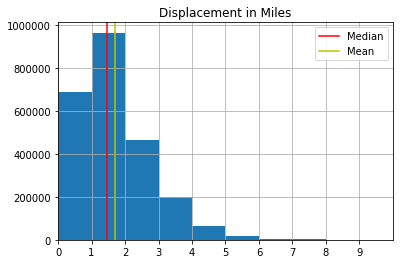

In [322]:
bins = np.arange(0, df.displacement.max()+1, 1)
df.displacement.hist( bins = bins)
plt.axvline(df.displacement.median(), color='r', label='Median')
plt.axvline(df.displacement.mean(), color='y', label='Mean')
plt.xticks(np.arange(0,10,1))
plt.xlim(0,10)
plt.legend();
plt.title('Displacement in Miles')

> Most of the people's ride has a displacement of 1 to 2 miles

## Bivariate Exploration

> Let's now, investigate relationships between pairs of variables in our
data.

**Duration of Ride as per User Type**

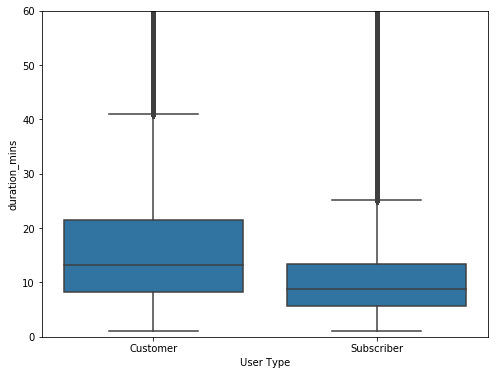

In [109]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'user_type', y = 'duration_mins', color = base_color)
plt.yticks(np.arange(0,80,10))
plt.ylim(0, 60)
plt.xlabel('User Type');

> Customers seem to have a five minutes higher average ride time than the subscribers. Also we can see some variation in durations between these user  types where Subscribers've less variance in duration.

**Displacement per User Type**

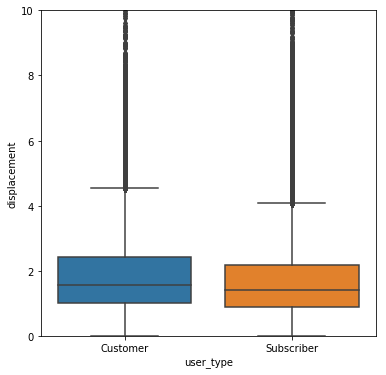

In [115]:
plt.figure(figsize=(6,6))
sns.boxplot(data = df, x = 'user_type', y = 'displacement');
plt.ylim(0,10);

> Customers and Subscribers have almost same displacement range. Maybe because customer or not, mostly people ride only for 1 to 3 miles.

**Ride Duration per Month**

(0, 16)

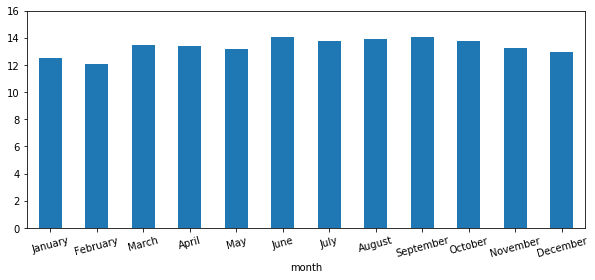

In [160]:
df.groupby('month').duration_mins.mean().reset_index().plot(x='month', y='duration_mins', kind='bar', color=base_color, legend=False, figsize=(10,4))
plt.xticks(rotation = 15);
plt.ylim(0,16)

> The average ride duation each month is around 12 to 14 minutes.

(0, 6)

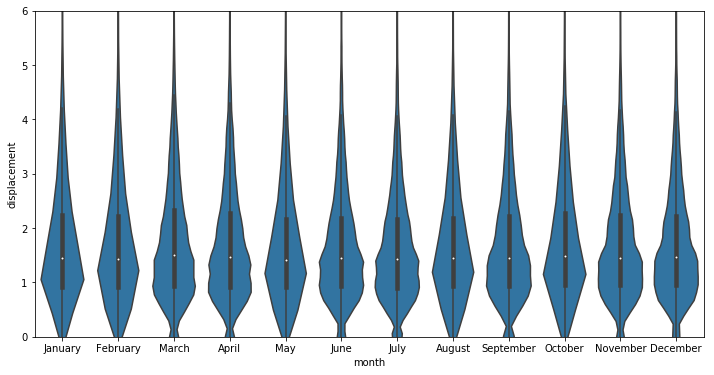

In [210]:
plt.figure(figsize = (12,6))
sns.violinplot(data = df, x = 'month', y = 'displacement', color = base_color)
plt.ylim(0,6)

> Similar displacement is observed throughout the year. 

**Ride Duration per Week**

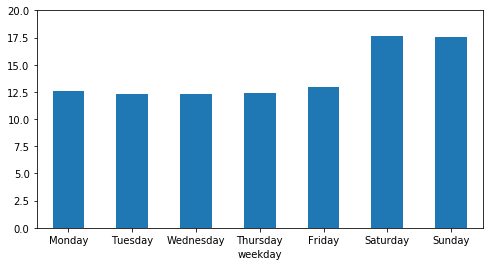

In [180]:
df.groupby('weekday').duration_mins.mean().reset_index().plot(kind = 'bar', x = 'weekday', y = 'duration_mins', figsize = (8,4), legend = False, color = base_color)
plt.xticks(rotation = 0);
plt.ylim(0,20);

> During weekend,  people spend around 4-5 more minutes riding bikes than working the days.

**Displacement per Week**

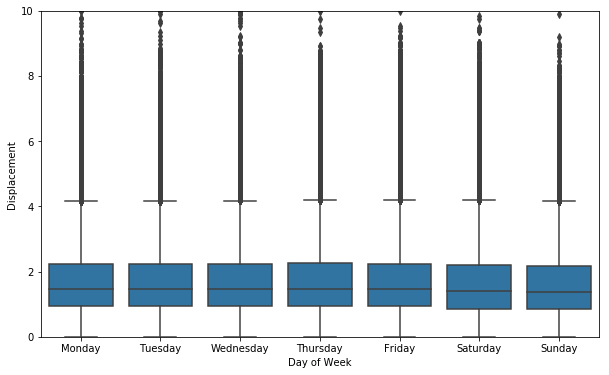

In [216]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weekday', y='displacement', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Displacement');
plt.ylim(0,10);

> Even though we saw that on avergae people use bikes for greater time on weekends, the displacement almost seems equal among days. Which mean the extra ride time on weekends is spent on random fun rides rather than some directed or planned ones.

In [323]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'displacement', 'duration_mins', 'month', 'day', 'hour',
       'weekday'],
      dtype='object')

**Weekly Ride usage as per User Type**

In [329]:
df.groupby(['user_type','weekday']).bike_id.count()

user_type   weekday  
Customer    Monday        64642
            Tuesday       66956
            Wednesday     64805
            Thursday      68754
            Friday        73997
            Saturday      70418
            Sunday        62608
Subscriber  Monday       315598
            Tuesday      343295
            Wednesday    336346
            Thursday     343052
            Friday       308487
            Saturday     150734
            Sunday       137498
Name: bike_id, dtype: int64

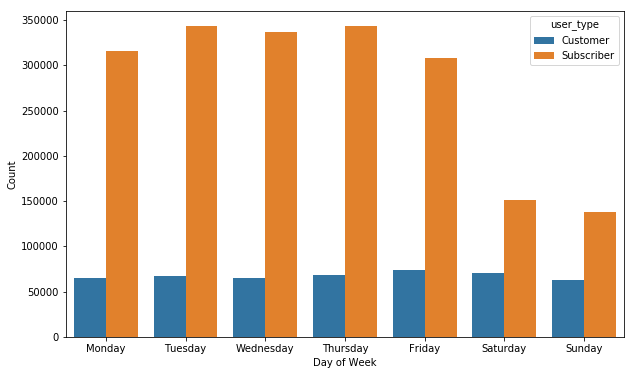

In [215]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='weekday', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

> The `Customers` are consistent in their ride usage but the `Suscribers` don't use rides durind weekend. Which again explains that a large propetion of users use bikes as a means to goto work place or school.

**Hourly ride usage of each User type**

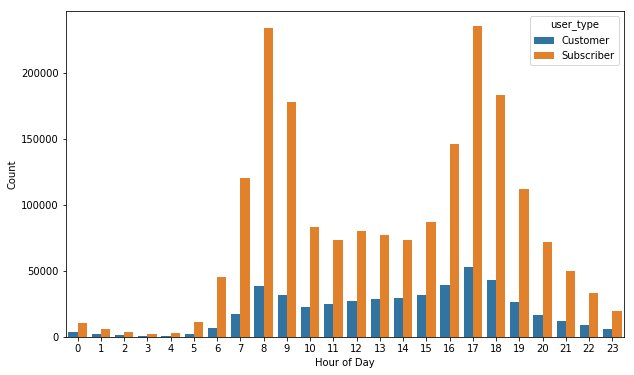

In [218]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

> The peak for both subscribers and Custmers occurs at same time. Which is exactly what we saw in our univariate exploration of hourly usage where peak hours were 8am in morning and 5pm in evening. 

**Monthly ride usage of each User type**

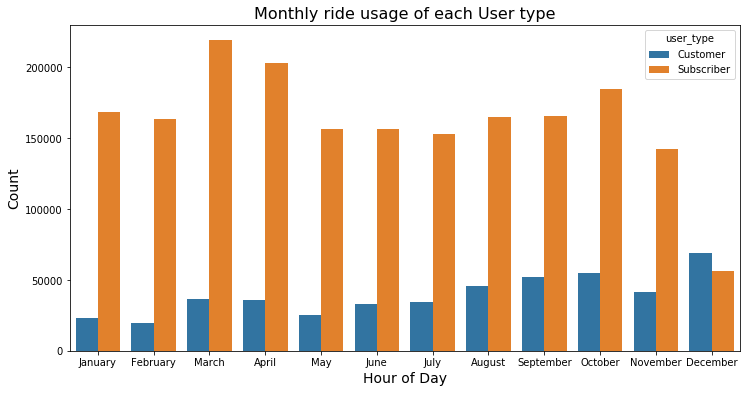

In [318]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month', hue='user_type');
plt.xlabel('Hour of Day', fontsize=14);
plt.ylabel('Count', fontsize=14);
plt.title('Monthly ride usage of each User type', fontsize=16);

> Since

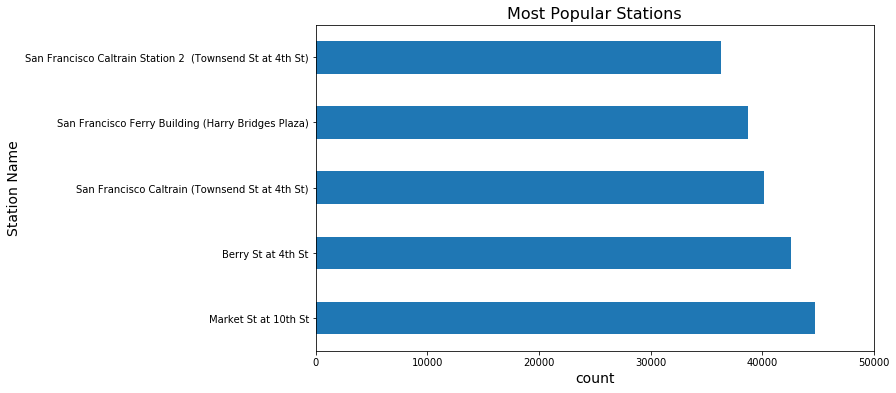

In [292]:
df.start_station_name.value_counts().head(5).reset_index(name = 'count').plot(kind = 'barh', x ='index', y = 'count', color = base_color, legend = False, figsize=(10,6))
plt.xlim(0, 50000)
plt.ylabel('Station Name', fontsize = 14)
plt.xlabel('count', fontsize = 14)
plt.title('Most Popular Stations', fontsize = 16);

In [310]:
df.user_type.value_counts()

Subscriber    1935010
Customer       472180
Name: user_type, dtype: int64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most interesting observation for this dataset is that, `during weekends people spend around 4-5 more minutes riding bikes than working the days`. Also that during morning and evening the numbers increases significantly especially at 8am and 5pm. The number of subscribers is 4 times less that number of customers and the subscribers.


## Multivariate Exploration

> Now looking at three or more variables to investigate our data even
further.

**Hourly bike usage for different user types as per weekdays**

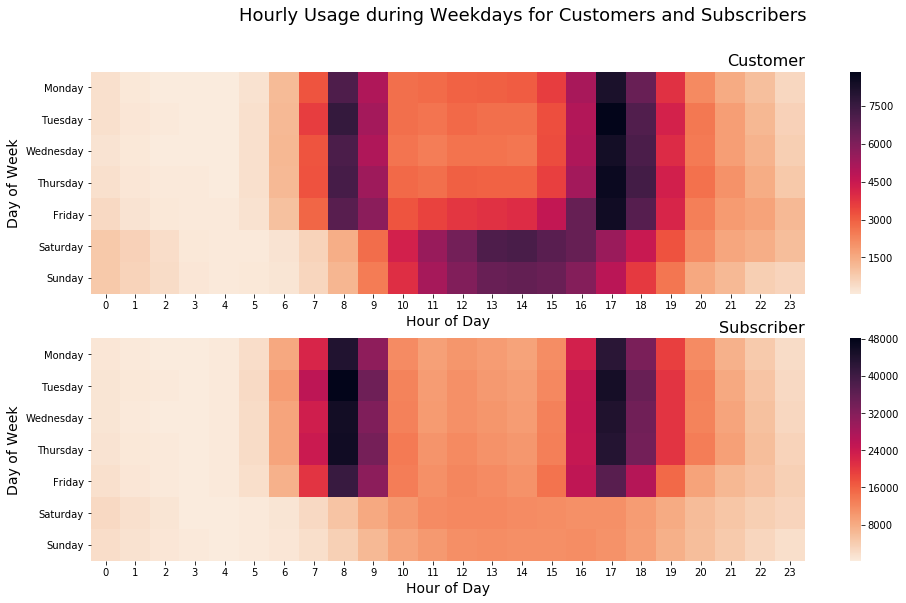

In [233]:
plt.figure(figsize = (16,9))
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize = 18)

plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['weekday', 'hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='weekday', columns='hour', values='count')
sns.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right', fontsize = 16);
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Day of Week', fontsize = 14);

plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['weekday', 'hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='weekday', columns='hour', values='count')
sns.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right', fontsize = 16);
plt.xlabel('Hour of Day', fontsize = 14);
plt.ylabel('Day of Week', fontsize = 14);

> During working days the peak usage for both subscribers and customers is seen at around 8 am in morning and at 5 pm in the evening. Which is something we were expecting to see because, these users use bikes to go to their workplace in morning and then to come back home at evening.
> Durinf Weekends, The peak usage is seen between 11 am and 4 pm ie. daytime

**Hourly Trip Duration per User Type**

Text(0.5, 1.0, 'Hourly Trip Duration per User Type')

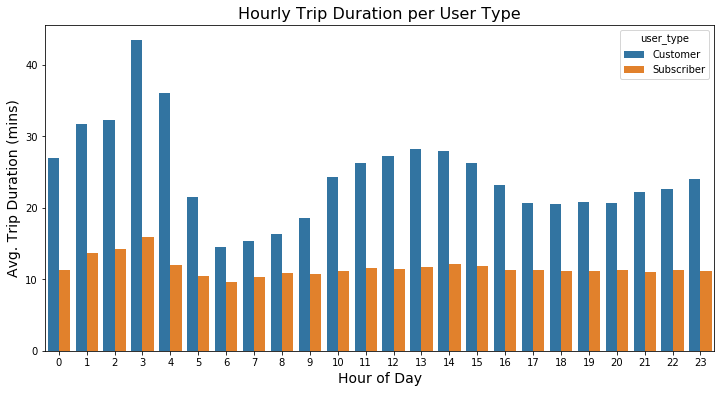

In [287]:
hr_ut_dur = df.groupby(['user_type','hour']).duration_mins.mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data = hr_ut_dur, x='hour', y='duration_mins' ,hue='user_type');
plt.xlabel('Hour of Day', fontsize=14);
plt.ylabel('Avg. Trip Duration (mins)', fontsize=14);
plt.title('Hourly Trip Duration per User Type', fontsize=16)

> Customers seen to have a higher average ride duration than subscribers. 

**Weekly Trip Duration per User Type**

In [309]:
df.groupby('user_type').duration_mins.mean()

user_type
Customer      22.531942
Subscriber    11.173579
Name: duration_mins, dtype: float64

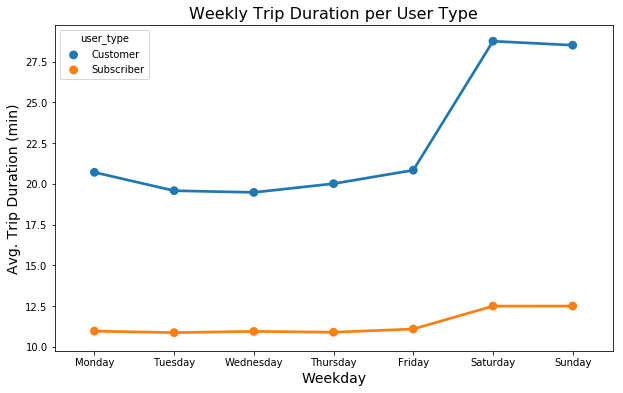

In [290]:
hr_ut_dur = df.groupby(['user_type','weekday']).duration_mins.mean().reset_index()
hr_ut_dur = hr_ut_dur.query('duration_mins < 600')
plt.figure(figsize=(10,6))
sns.pointplot(data = hr_ut_dur, x='weekday', y='duration_mins' ,hue='user_type');
plt.xlabel('Weekday', fontsize=14);
plt.ylabel('Avg. Trip Duration (min)', fontsize=14);
plt.title('Weekly Trip Duration per User Type', fontsize=16);

> Customer's favorite biking days are weekends for long trips. As we can see a jump of around 5 minutes average trip duration time. 
> Subscribers also made a jump during weekends, but the varriance is relativelly less, maybe because out dataset has about 4 times more data of subscribers than customers.

> We're seeing this behavour because people have more free time during weekends, and biking is fun along with its good health affects. 

### Some of the relationships we observed in this part of the investigation. 
> We observed the the relationships between day, time of day and duration of trips for different user types.  

### Were there any interesting or surprising interactions between features?

> - We saw that customers spends more time on trips than subscribers, specially during weekends where they out triped the subscribers.
- Subscribers mainly uses rides for going to work and coming back home.